# **Part 03. RNN 개요 및 구현**
- PNS, 빅데이터 연구소, 성균관대 박혜정 이사님
- 회사에서 원하는 것은 "이것을 구현할 수 있을 것인가?"
- 문헌 위주의 연구, 이를 구현해서 제공하는 업체라면 간단하게 구현해도 ok
- 이론에서 끝나는 것보다는 실제로 구현한 project가 제일 중요
- 최근 제조업에서 도입이 제일 많이 되고 있음.
- 스마트 팩토리, 시각화를 제일 중시함
- 비젼을 중요시함
- 사람의 눈보다 컴퓨터의 눈이 정확!
- 재고의 불량률, 실제 모니터링하는 업무를 자동화, 시각화시키는 업무가 중요
- 도메인에 대한 지식이 있는 사람들 vs 우리...
- 어떤 분석을 수행할 때는 탐색을 많이 하게 됨
- 내가 부족한 부분들을 문헌 등을 읽어 해석하고 판단하는 능력을 길러야 할 것
- 기업 입장에서는 와도 바로 못써먹고, 현장에 있는 사람들은 기술이 없고..
- 강제적으로 교육을 시키고 있는 상황
- 스마트 팩토리, 사람이 줄어들음.
- 기술력 + 도메인 지식
- 자체적으로 회사 데이터는 회사 내부의 사람이 처리하기를 원함
- 중견기업, TF팀, 회사가 전사적으로 지원하지 않는 이상, 규모가 크지 않음
- 회사에서는 개개인의 프로젝트 경험이 얼마나 있는지, 회사 관련 일에 얼마나 관련있는 프로젝트를 했는지
- AI 가능한 인력들을 많이 찾고 있음
- 제조업, IT, 금융 등 데이터를 분석하는 기업들이 많아짐
- 나는 '수학'이라는 강점을 살려야할 것
- 언어를 배울 때는 재미로 배우고 목적이 분명해야 실력이 팡팡 늘음
- python, 내가 자주 사용하는 것 순서대로 차근차근 내 것으로 만들어야 함
- 실제 현실은 갖춰진 데이터가 주어져 있지 않음
- 알고리즘, 함수 하나로 수행이 가능, 이제는 데이터가 문제
- 이것이 RNN에 고면 최고조로 치솟음...ㅎㅎ
- Text를 분석용 데이터에 맞춰서 전처리를 해줘야 함
- RNN은 주로 시계열 데이터에 사용
- 시계열 데이터는 앞뒤 순서가 존재
- 기업에서 가장 많이 하는 것은 '수율 예측'
- 음성 데이터 또한 RNN 적용이 가능, because 순서가 존재하기 때문!
- 스마트폰, 글자 쓰는 패턴을 RNN으로 학습해놓음
- Garbage In, Garbage Out
- 내 무기로 만들기 위한 시간이라고 생각
- 프로그램은 눈으로 보지말고 직접 타이핑해라
- 이분들 입장에서는 프로그램을 배울 때 들리는 소리가 다름

# Chapter 1. Case Study : Vanilla char-RNN

## Vanilla RNN
- CNN이나 다른 Neural Network를 배웠던 지식으로 RNN을 배우는 데 있어서 깨야하는 고정관념
    - 레이어마다 Weight가 다르다
    - RNN에서는 Weight를 공유한다.
- 프로그래밍에서 어떠한 개념을 _완전 기본적인 기능만 구현한 상태_를 **Vanilla Implementation**이라고 한다.
    - 따라서 이 기본적인 형태를 알아야 RNN을 배우는데 무리가 없다.
- Sequence data를 예측하는데 좋고, 역시 기본적인 개념만 담겨있어 RNN을 처음 이해하는데 매우 좋다.
- Weight를 똑같이 반영한다는 가정에서 시작
- RNN을 동작시키는 **Cell**이 있는데, 이들이 Hidden Layer를 이룬다. Hidden Layer의 형태는 Weight의 형태에 큰 영향을 준다.
- Vanilla RNN이 'hello'라는 단어가 이어져 있다는 것을 배우는 과정을 통해 Weight의 형태를 파악하는 데에서부터 시작
    - 이것은 주로 구글 등의 검색엔진에서의 자동 완성 기능에서 활용
    - 추천해주는 형태에서도 사용이 가능하다

In [1]:
from collections import Counter
s = 'hello'
hello = Counter(s)
print(hello)

Counter({'l': 2, 'h': 1, 'e': 1, 'o': 1})


In [2]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical
x1,x2,x3,x4,x5 = to_categorical([0,1,2,2,3]).reshape(5,4,1)

In [3]:
import numpy as np
np.hstack((x1,x2,x3,x4,x5))

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

## Karpathy 예제

In [4]:
hidden_size = 3
vocab_size = len(x1) # length of one-hot encoding vector
# model parameters
Wxh = np.random.randn(hidden_size, vocab_size)*0.01 # input to hidden
Whh = np.random.randn(hidden_size, hidden_size)*0.01 # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size)*0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size, 1)) # output bias

Wxh.shape, Whh.shape, Why.shape, bh.shape, by.shape

((3, 4), (3, 3), (4, 3), (3, 1), (4, 1))

- No Bias
$$h_t=\text{tanh}(W_{hh}h_{t-1}+W_{xh}x_t+b_h)$$
$$y_t=W_{hy}h_t+b_y$$
- 여기에서는 y에 대한 활성화 함수를 굳이 사용하지 않는다
- 이유는 바로 값을 배출해도 상관이 없기 때문

In [5]:
# 교재의 예시대로 Weight를 아래와 같이 부여
Wxh = np.ones((3,4))
Whh = np.ones((3,3))
Why = np.tile(np.array([1,0,2,3], dtype=np.float32).reshape(-1,1), 3)
print(Wxh, '\n\n', Whh, '\n\n', Why)
Wxh.shape, Whh.shape, Why.shape, bh.shape, by.shape

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 

 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

 [[1. 1. 1.]
 [0. 0. 0.]
 [2. 2. 2.]
 [3. 3. 3.]]


((3, 4), (3, 3), (4, 3), (3, 1), (4, 1))

$$\text{h}\rightarrow\text{?}$$

In [6]:
h0 = np.zeros((hidden_size, 1)) # reset RNN Memory
h1 = np.tanh(np.dot(Whh, h0) + np.dot(Wxh, x1) + bh)
y1 = np.dot(Why, h1) + by
print(h1, '\n\n', y1)

[[0.76159416]
 [0.76159416]
 [0.76159416]] 

 [[2.28478247]
 [0.        ]
 [4.56956494]
 [6.8543474 ]]


In [7]:
p = np.exp(y1) / np.sum(np.exp(y1)) # softmax
ix = np.random.choice(list(range(vocab_size)), p=p.ravel()) # 결과값에서 어떤 것을 선택할지는 프로그래머의 마음
ix = 2 # index 2가 9%의 확률로 뽑혔다고 가정
p, ix

(array([[0.00930861],
        [0.00094758],
        [0.09144356],
        [0.89830026]]), 2)

In [8]:
x = np.zeros((vocab_size, 1))
x[ix] = 1
x # l

array([[0.],
       [0.],
       [1.],
       [0.]])

$$\text{h}\rightarrow\text{l}$$
$$\text{l}\rightarrow\text{?}$$

In [9]:
h2 = np.tanh(np.dot(Whh, h1) + np.dot(Wxh, x) + bh)
y2 = np.dot(Why, h2) + by
print(h2, '\n\n', y2)

[[0.99719911]
 [0.99719911]
 [0.99719911]] 

 [[2.99159734]
 [0.        ]
 [5.98319468]
 [8.97479202]]


In [10]:
p = np.exp(y2) / np.sum(np.exp(y2))
ix = np.random.choice(list(range(vocab_size)), p=p.ravel()) # 결과값에서 어떤 것을 선택할지는 프로그래머의 마음
p, ix

(array([[2.39421535e-03],
        [1.20206788e-04],
        [4.76867174e-02],
        [9.49798861e-01]]), 3)

In [11]:
x = np.zeros((vocab_size, 1))
x[ix] = 1
x # o

array([[0.],
       [0.],
       [0.],
       [1.]])

$$\text{h}\rightarrow\text{l}$$
$$\text{l}\rightarrow\text{o}$$
$$\text{o}\rightarrow\text{?}$$

In [12]:
h3 = np.tanh(np.dot(Whh, h2) + np.dot(Wxh, x) + bh)
y3 = np.dot(Why, h3) + by
print(h3, '\n\n', y3) 

[[0.99931794]
 [0.99931794]
 [0.99931794]] 

 [[2.99795381]
 [0.        ]
 [5.99590762]
 [8.99386143]]


In [13]:
p = np.exp(y3) / np.sum(np.exp(y3))
ix = np.random.choice(list(range(vocab_size)), p=p.ravel()) # 결과값에서 어떤 것을 선택할지는 프로그래머의 마음
p, ix

(array([[2.36476191e-03],
        [1.17975717e-04],
        [4.74004231e-02],
        [9.50116839e-01]]), 3)

In [14]:
x = np.zeros((vocab_size, 1))
x[ix] = 1
x

array([[0.],
       [0.],
       [0.],
       [1.]])

$$\text{h}\rightarrow\text{l}$$
$$\text{l}\rightarrow\text{o}$$
$$\text{o}\rightarrow\text{o}$$
$$\text{o}\rightarrow\text{?}$$

In [15]:
h4 = np.tanh(np.dot(Whh, h3) + np.dot(Wxh, x) + bh)
y4 = np.dot(Why, h4) + by
print(h4, '\n\n', y4)
p = np.exp(y4) / np.sum(np.exp(y4))
ix = np.random.choice(list(range(vocab_size)), p=p.ravel()) # 결과값에서 어떤 것을 선택할지는 프로그래머의 마음
p, ix

[[0.99932655]
 [0.99932655]
 [0.99932655]] 

 [[2.99797965]
 [0.        ]
 [5.9959593 ]
 [8.99393895]]


(array([[2.36464291e-03],
        [1.17966732e-04],
        [4.73992626e-02],
        [9.50118128e-01]]), 3)

In [16]:
x = np.zeros((vocab_size, 1))
x[ix] = 1
x

array([[0.],
       [0.],
       [0.],
       [1.]])

$$\text{h}\rightarrow\text{l}$$
$$\text{l}\rightarrow\text{o}$$
$$\text{o}\rightarrow\text{o}$$
$$\text{o}\rightarrow\text{o}$$
- 뽑힌 단어는 hlooo
- 제대로 학습시킨다면 hello를 출력시킬 수 있다.

$$h_t=\text{tanh}(W_{hh}h_{t-1}+W_{xh}x_t+b_h)$$
$$y_t=W_{hy}h_t+b_y$$

- https://gist.github.com/karpathy/d4dee566867f8291f086

In [17]:
def sample(h, seed_ix, n):
    x = np.zeros((vocab_size, 1))
    x[seed_ix] = 1
    ixes = []
    for t in range(n):
        h = np.tanh(np.dot(Whh, h) + np.dot(Wxh, x) + bh)
        y = np.dot(Why, h) + by
        p = np.exp(y) / np.sum(np.exp(y))
        ix = np.random.choice(list(range(vocab_size)), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1
        ixes.append(ix)
    return ixes

```python
[char_to_ix[ch] for ch in data.lower()[0:10]] # inputs
[char_to_ix[ch] for ch in data.lower()[0+1:10+1]] # targets
```

- $\text{tanh}(x)$의 미분
$$\dfrac{d}{dx}\text{tanh}(x)=1-\text{tanh}^2(x)$$

In [18]:
def lossFun(inputs, targets, hprev):
    xs, hs, ys, ps = {}, {}, {}, {}
    hs[-1] = np.copy(hprev)
    loss = 0
    # forward pass
    for t in range(len(inputs)):
        xs[t] = np.zeros((vocab_size, 1)) # encode in 1-of-k representation
        xs[t][inputs[t]] = 1
        hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden layer
        ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars
        loss += -np.log(ps[t][targets[t], 0]) # softmax (cross-entropy Loss)
    # backward pass : compute gradients going backwards
    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)
    dhnext = np.zeros_like(hs[0])
    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t])
        dy[targets[t]] -= -1 # backprop into y
                             # see http://cs231n.github.io/neural-networks-case-study/#grad if confused here
        dWhy += np.dot(dy, hs[t].T) # (vocab_size, 1) x (hidden_size, 1).T = (vocab_size, hidden_size)
        dby += dy # add prop => 그대로
        dh = np.dot(Why.T, dy) + dhnext # backprop into h
                                        # (vocab_size, hidden_size).T x (vocab_size, 1) + (hidden_size, 1)
                                        # 거꾸로 실행되기 대문에 h_t의 경우 역전파가 남아있음. dhnext를 더해준다.
        dhraw = (1 - hs[t] * hs[t]) * dh # (hidden_size, 1)
                                         # backprop through tanh nonlinearity
        dbh += dhraw # add prop => 그대로
        dWxh += np.dot(dhraw, xs[t].T) # (hidden_size, 1) x (vocab_size, 1).T
        dWhh += np.dot(dhraw, hs[t].T) # (hidden_size, 1) x (hidden_size, 1).T
        dhnext = np.dot(Whh.T, dhraw) # (hidden_size, hidden_size).T x (hidden_size, 1)
    for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
        np.clip(dparam, -5, 5, out=dparams) # clip to mitigate exploding gradients
    return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs) - 1]

`np.clip`
- https://rfriend.tistory.com/tag/np.clip%28%29

In [19]:
a = np.arange(10) # Clip (limit) the values in an array.
np.clip(a, 2, 7)
print(a)
np.clip(a, 2, 7, out=a)
print(a)

[0 1 2 3 4 5 6 7 8 9]
[2 2 2 3 4 5 6 7 7 7]


## 수업 시간에 진행한 예시

```
pip3 install graphviz
pip3 install pydot-ng
```

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense, Activation
from keras.utils import np_utils

import os

from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
# sample text
sample =  'hihello'

char_set = list(set(sample))
char_dic = { w : i for i, w in enumerate(char_set)}
print(char_set, '\n', char_dic)

['h', 'l', 'e', 'o', 'i'] 
 {'h': 0, 'l': 1, 'e': 2, 'o': 3, 'i': 4}


In [3]:
x_str = sample[:-1]
y_str = sample[1:]

data_dim = len(char_set)
timesteps = len(y_str)
num_classes = len(char_set)

print(data_dim, timesteps, num_classes)

5 6 5


In [4]:
x = [char_dic[c] for c in x_str]
y = [char_dic[c] for c in y_str]

# One-hot encoding
x = np_utils.to_categorical(x, num_classes=num_classes)
x = x.reshape(-1, x.shape[0], data_dim)
print(x.shape)

y = np_utils.to_categorical(y, num_classes=num_classes)
y = y.reshape(-1, y.shape[0], data_dim)
print(y.shape)

(1, 6, 5)
(1, 6, 5)


In [5]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.25)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [6]:
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense, Activation, SimpleRNN

model = Sequential()
# model.add(LSTM(num_classes,
#                input_shape=(timesteps, data_dim),
#                return_sequences=True))
# model.add(TimeDistributed(Dense(num_classes)))
model.add(SimpleRNN(num_classes,
               input_shape=(timesteps, data_dim),
               return_sequences=True))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 6, 5)              55        
_________________________________________________________________
dense_1 (Dense)              (None, 6, 5)              30        
_________________________________________________________________
activation_1 (Activation)    (None, 6, 5)              0         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [9]:
import os
# Store model graph in png
# (Error occurs on in python interactive shell)
# plot_model(model, to_file=os.path.basename(__file__) + '.png', )

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit(x, y, epochs=1, batch_size=1)

Epoch 1/1
1/1 [==============================] - 0s 268ms/step - loss: 1.6481 - acc: 0.3333


In [27]:
model = Sequential()
# model.add(LSTM(num_classes,
#                input_shape=(timesteps, data_dim),
#                return_sequences=True))
# model.add(TimeDistributed(Dense(num_classes)))
model.add(SimpleRNN(num_classes,
               input_shape=(timesteps, data_dim),
               return_sequences=True))
model.add(TimeDistributed(Dense(num_classes)))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x, y, epochs=5)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 6, 5)              55        
_________________________________________________________________
time_distributed_3 (TimeDist (None, 6, 5)              30        
_________________________________________________________________
activation_4 (Activation)    (None, 6, 5)              0         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1/1 [==============================] - 1s 635ms/step - loss: 1.6086 - acc: 0.1667
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 1.6059 - acc: 0.1667
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 1.6032 - acc: 0.1667
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 1.6005 - acc: 0.1667
Epoch 5/5
1/1 [===========

In [28]:
predictions = model.predict(x, verbose=0)
predictions.shape

(1, 6, 5)

In [29]:
for i, prediction in enumerate(predictions):
    print(prediction)
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print(x_index, ''.join(x_str))
    
    index = np.argmax(prediction, axis=1)
    result = [char_set[j] for j in index]
    print(index, ''.join(result))

[[0.18107945 0.23325357 0.23997474 0.21106157 0.13463071]
 [0.16334862 0.21095915 0.27526477 0.17984176 0.17058566]
 [0.13090582 0.20172945 0.35541117 0.2012277  0.11072585]
 [0.10461086 0.23834838 0.35907933 0.14839053 0.1495709 ]
 [0.14729805 0.22042243 0.2664588  0.15620089 0.20961978]
 [0.21194631 0.19939335 0.18108252 0.1696354  0.2379424 ]]
[0 4 0 2 1 1] hihell
[2 2 2 2 2 4] eeeeei


# 주가 예측
- `pip install fix-yahoo-finance==0.1.30`

In [11]:
import fix_yahoo_finance as yf
data = yf.download('005930.KS', start='2017-01-01', end='2019-04-30')

[*********************100%***********************]  1 of 1 downloaded


In [12]:
import pandas as pd
data_ind = data.index.map(lambda x : pd.Timestamp(
    str(x.year) + '-{:02}'.format(x.month)))
data_ind

DatetimeIndex(['2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01',
               ...
               '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-02-01'],
              dtype='datetime64[ns]', name='Date', length=508, freq=None)

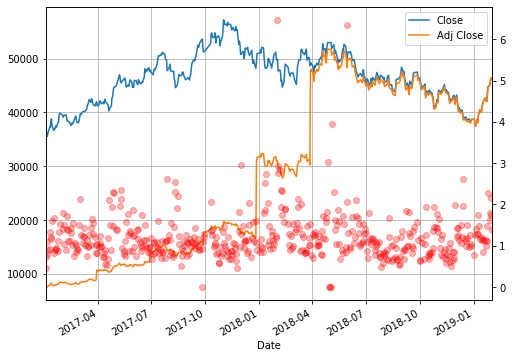

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

stock_plot = data[['Close', 'Adj Close']].plot(ax=ax1)
# volume_plot = (data['Volume'] / 1e7).plot(kind='bar', ax=ax2)
volume_plot = (data['Volume'] / 1e7).plot(ax=ax2, color='r', alpha=.3, marker='o', linestyle='')
ax1.grid()
plt.show()

### 구글 데이터

In [31]:
goog = yf.download('GOOG', start='2017-01-01', end='2019-04-30')

[*********************100%***********************]  1 of 1 downloaded


In [37]:
goog.iloc[33:35]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-21,828.66,833.45,828.35,831.66,831.66,1262300
2017-02-22,828.66,833.25,828.64,830.76,830.76,982900
